<a href="https://colab.research.google.com/github/A01749373/PortafolionImplementacionM2-Framework/blob/main/PortafolioImplementacionM2_Framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

♉ (de Mayo) Ariadna Jocelyn Guzman Jimenez A01749373

In [2]:
# Importación de liberias
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# Eliminacion de datos NaN
df.dropna(axis = 0) # No hay

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
sex_dummy = pd.get_dummies(df['sex'])
smoker_dummy = pd.get_dummies(df['smoker'])
region_dummy = pd.get_dummies(df['region'])


df = pd.concat([df,sex_dummy,smoker_dummy,
                    region_dummy], axis=1)

df.rename(columns={'no': 'non-smoker',
              'yes': 'nicotian'}, inplace=True)

df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   sex         1338 non-null   object 
 2   bmi         1338 non-null   float64
 3   children    1338 non-null   int64  
 4   smoker      1338 non-null   object 
 5   region      1338 non-null   object 
 6   charges     1338 non-null   float64
 7   female      1338 non-null   uint8  
 8   male        1338 non-null   uint8  
 9   non-smoker  1338 non-null   uint8  
 10  nicotian    1338 non-null   uint8  
 11  northeast   1338 non-null   uint8  
 12  northwest   1338 non-null   uint8  
 13  southeast   1338 non-null   uint8  
 14  southwest   1338 non-null   uint8  
dtypes: float64(2), int64(2), object(3), uint8(8)
memory usage: 83.8+ KB


In [6]:
X = df[['age', 'bmi', 'children',
    'female','male','non-smoker',
    'nicotian','northeast','northwest',
    'southeast','southwest',]]

y = df['charges']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [13]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Intersection:",lr.intercept_)

Intersection: 323.60812577955403


In [12]:
print("Linear regression Training Accuracy:",lr.score(X_train, y_train))

Linear regression Training Accuracy: 0.7442727131876871


In [9]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,
columns=['Coefficient'])

print(coeff_df)

             Coefficient
age           248.279182
bmi           321.111606
children      522.329300
female        -30.198817
male           30.198817
non-smoker -12059.595224
nicotian    12059.595224
northeast     264.610543
northwest     451.982658
southeast    -636.070405
southwest     -80.522796


In [10]:
predictions = lr.predict(X_test)
print("Predicted medical costs values:", predictions)

Predicted medical costs values: [ 3.69627382e+04  6.27109828e+03  2.64493341e+03  1.36911396e+03
  4.14802089e+03  6.41750273e+03  1.41688825e+03  2.45240632e+04
  1.45373445e+04  1.00957819e+04  1.15890568e+04  4.64149946e+03
  5.56669924e+03  6.77362932e+03  9.07748240e+03  2.13968892e+03
  7.26675508e+03  3.92985225e+04  9.45068731e+03  2.91833659e+04
  1.35493440e+04  6.78251816e+03  2.98420217e+04  3.06348026e+04
  2.63111645e+03  1.00226140e+03  5.90182541e+03  5.33769807e+03
  3.26003163e+03  3.61866774e+04  1.16964021e+04  4.60802524e+03
  8.08353186e+03  6.19090239e+03  5.76773844e+03  3.35020578e+04
  7.30484206e+03  8.34675034e+03  9.03216201e+03  1.53222526e+04
  1.32956794e+04  3.82133526e+03  1.09531983e+04  2.06706624e+03
  1.40750503e+04  6.25693283e+03  1.00080824e+04  1.17325389e+04
  6.55800600e+03  9.77758771e+03  9.78864902e+03  2.66549845e+03
  7.30184294e+03  5.58016455e+03  1.48717347e+04  1.48591137e+04
  7.14409953e+03  6.14736470e+03  3.62365683e+04 -1.847211

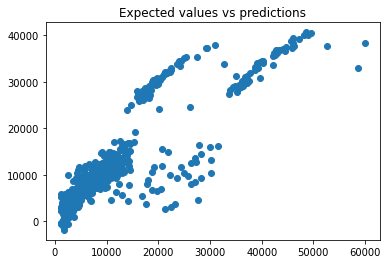

In [11]:
plt.scatter(y_test, predictions)
plt.title("Expected values vs predictions")
plt.show()